In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Importing dataset
df= pd.read_csv("/content/drive/MyDrive/pima diabetes data set/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4240, 16)

In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.isnull().values.any()

True

In [ ]:
#Checking out the correlation between features
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


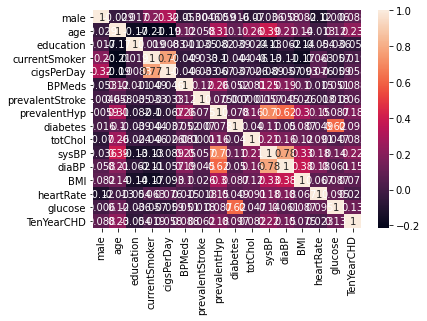

In [ ]:
#visualizing the correlation matrix
import seaborn as sns

correlationmatrix= df.corr()
top_correlated_features= correlationmatrix.index


sns.heatmap(df[top_correlated_features].corr(), annot= True)



In [ ]:
#If in case your label column is alphabetically presented- we can convert it to boolean form and vice-versa
diabetes_outcome_map= {True:1, False:0}
df['Outcome']= df['Outcome'].map(diabetes_outcome_map)
df.head()
# We wont be running this snippet

KeyError: ignored

In [ ]:
#checking if our datset is imbalanced
df['Outcome'].value_counts()

KeyError: ignored

In [ ]:
#Alternatively
diabetes_yes_count= len(df.loc[df['Outcome']==1])
diabetes_no_count= len(df.loc[df['Outcome']==0])
print(diabetes_yes_count, diabetes_no_count)

KeyError: ignored

In [ ]:
#Splitting our datset
from sklearn.model_selection import train_test_split
X= df.iloc[:, 0:8]
y=df.iloc[:,8]
print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0            6      148             72  ...  33.6                     0.627   50
1            1       85             66  ...  26.6                     0.351   31
2            8      183             64  ...  23.3                     0.672   32
3            1       89             66  ...  28.1                     0.167   21
4            0      137             40  ...  43.1                     2.288   33

[5 rows x 8 columns]
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
#Alternatively the splitting could have been done as:
#feature_cols= [	'Pregnancies'	'Glucose'	'BloodPressure'	'SkinThickness'	'Insulin'	'BMI'	'DiabetesPedigreeFunction'	'Age']
#label_cols=['Outcome']

#X= df[feature_cols].values
#y= df[label_cols].values
# We wont be running this snippet as we have already splitted our feature and label column above

In [ ]:
#Handling the meaningless '0'values in our features which ruin the overall data instance

#Lets first check-out number of such values
print("total number of rows = {0}".format(len(df)))
print("total number of rows having 0 in Pregnancies column= {}".format(len(df.loc[df['Pregnancies']==0])))
print("total number of rows having 0 in Glucose column= {}".format(len(df.loc[df['Glucose']==0])))
print("total number of rows having 0 in BloodPressure column = {}".format(len(df.loc[df['BloodPressure']==0])))
print("total number of rows having 0 in SkinThickness column = {}".format(len(df.loc[df['SkinThickness']==0])))
print("total number of rows having 0 in Insulin column = {}".format(len(df.loc[df['Insulin']==0])))
print("total number of rows having 0 in BMI column = {}".format(len(df.loc[df['BMI']==0])))
print("total number of rows having 0 in DiabetesPedigreeFunction column = {}".format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("total number of rows having 0 in Age column = {}".format(len(df.loc[df['Age']==0])))

total number of rows = 768
total number of rows having 0 in Pregnancies column= 111
total number of rows having 0 in Glucose column= 5
total number of rows having 0 in BloodPressure column = 35
total number of rows having 0 in SkinThickness column = 227
total number of rows having 0 in Insulin column = 374
total number of rows having 0 in BMI column = 11
total number of rows having 0 in DiabetesPedigreeFunction column = 0
total number of rows having 0 in Age column = 0


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer_obj= SimpleImputer(missing_values=0, strategy= "mean")
X = imputer_obj.fit_transform(X)

In [ ]:
#Now lets split our data in train and test set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=42)

In [ ]:
#Applying Random Forest

from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
predictions= random_forest_model.predict(X_test)
from sklearn import metrics
print("Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, predictions)))

Accuracy=  0.753


In [ ]:
#Lets try XGBoost with Hyperparameter Tuning

In [ ]:
#Hyperparameter Tuning using RandomizedSearchCV

params= {
    "learning_rate"     : [0.05, 0.1, 0.10, 0.15, 0.2, 0.25, 0.3],
    "max_depth"         : [3,4,6,7,8,10, 12,15],
    "min_child_weight"  : [1,3,5,7],
    "gamma"             : [0.0,0.1, 0.2, 0.3, 0.4, 0.5],
    "colsample_bytree"  : [0.3,0.4, 0.5, 0.6, 0.7]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import xgboost

In [ ]:
classifier= xgboost.XGBClassifier()

In [ ]:
random_search= RandomizedSearchCV(classifier, 
                                  param_distributions=params, 
                                  n_iter=10, 
                                  scoring='roc_auc', 
                                  n_jobs=-1, 
                                  cv=5,
                                  verbose=3)

In [ ]:
#Lets define a time function to check on time-lapse
def timer(start_time= None):
  if not start_time:
    start_time= datetime.now()
    return start_time

  elif start_time: 
    thour, temp_sec= divmod((datetime.now()- start_time).total_seconds(),3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes and %s seconds' %(thour, tmin, round(tsec, 2)))

#The divmod() method takes two parameters x and y, where x is treated as numerator and y 
#is treated as denominator.The method calculates both x / y and x % y and returns both the values
#(q, x % y), where q is the whole part of the quotient.


In [ ]:
from datetime import datetime

start_time= timer(None)
random_search.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



 Time taken: 0 hours 0 minutes and 1.56 seconds


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
final_classifier= xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
final_classifier.fit(X_train, y_train)

y_pred= final_classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
score= accuracy_score(y_test, y_pred)

print(cm)
print(score)

[[124  27]
 [ 27  53]]
0.7662337662337663


In [ ]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(final_classifier, X_train, y_train, cv=10)

In [ ]:
score

array([0.7962963 , 0.75925926, 0.74074074, 0.74074074, 0.75925926,
       0.83333333, 0.7037037 , 0.71698113, 0.77358491, 0.83018868])

In [ ]:
score.mean()

0.7654088050314465